In [1]:
%matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def short_waveforms(starttime, endtime):
    start_t = UTCDateTime(starttime)
    end_t = UTCDateTime(endtime)
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    ax.legend
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    h1 = (-2)*U + V + W
    h2 = math.sqrt(3)*V - math.sqrt(3)*W
    z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

    offset = np.full(len(z), fill_value=500)

    ax.plot(t, h1 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
    ax.plot(t, h2 + offset, label='Horizontal 2', color = "#aff8d8", alpha = 0.8)
    ax.plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)


    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)

    if ylim == True:
        ax.set_ylim(-1800,2000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    ax.legend()

<IPython.core.display.Javascript object>


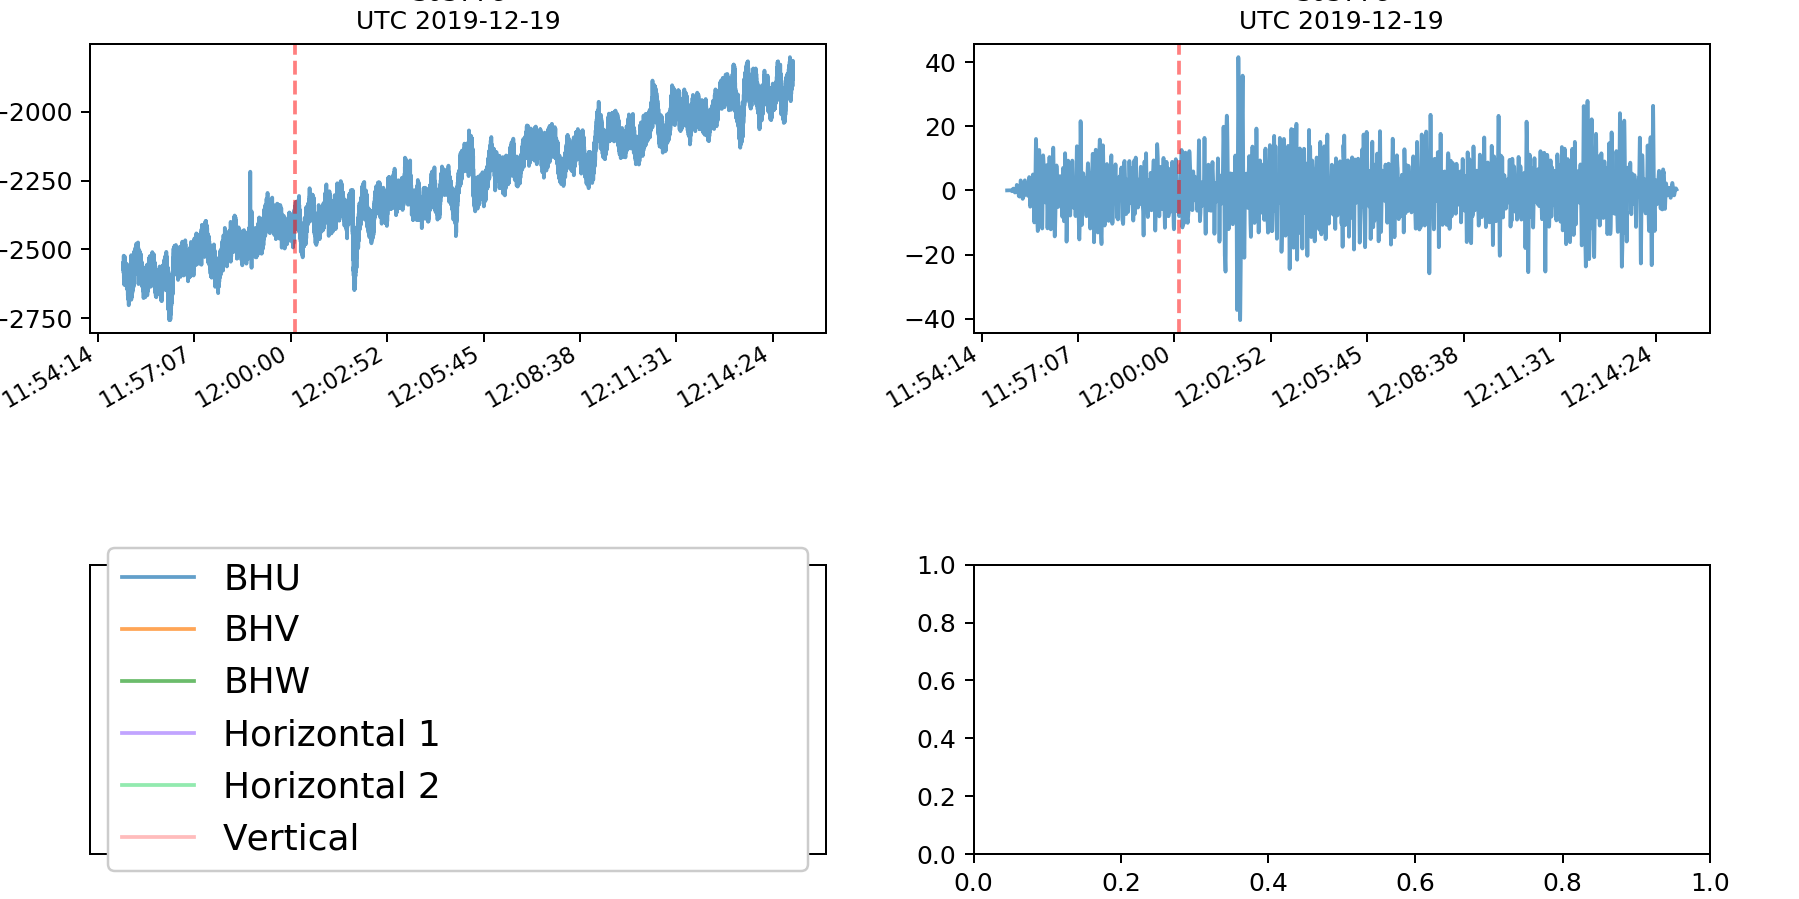

In [2]:
fig,ax = plt.subplots(2,2, figsize=(10,5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

In [3]:
t_377c = "2019-12-19T11:55:00"
st_377c = waveforms(t_377c, 20*60 )
waveform_plotter("2019-12-19T12:00:08", st_377c, '377c', ax[0][0], channels= [0])

In [4]:
f_377c = waveform_filter(st_377c, 'lf')
waveform_plotter("2019-12-19T12:00:08", f_377c, '377c', ax[0][1], channels= [0])

In [5]:
#creating the legend
st = waveforms(t_377c, 20*60)

for channel in [0,1,2]:
    full_code = st[channel].id
    code = full_code[12:]
    tr = st[channel]
    t = tr.times('matplotlib')
    
    zeros = st[channel].data * 0
    
    if code == 'BHU':
        U = st[channel].data
    elif code == 'BHV':
        V = st[channel].data
    elif code == 'BHW':
        W = st[channel].data
        
        
    if code == 'BHU':
        ax[1,0].plot(t, zeros, label=code, color = "#1f77b4", alpha = 0.7)
    elif code == 'BHV':
        ax[1,0].plot(t, zeros, label=code, color = "#ff7f0e", alpha = 0.7)
    elif code == 'BHW':
        ax[1,0].plot(t, zeros, label=code, color = "#2ca02c", alpha = 0.7)
    else:
        ax[1,0].plot(t, zeros, label="Unknown " + code, color = "black", alpha = 0.7)
        
h1 = (-2)*U + V + W
h2 = math.sqrt(3)*V - math.sqrt(3)*W
z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W 

ax[1,0].plot(t, h1, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[1,0].plot(t, h2, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
ax[1,0].plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)
    
ax[1,0].legend(fontsize = 'x-large', loc = 'center', facecolor = 'white', mode = 'expand', framealpha = 1)
ax[1,0].get_xaxis().set_visible(False) 
ax[1,0].get_yaxis().set_visible(False) 

In [6]:
#updating coefficients
params = ([0,30], [120,30], [240,30])

az = []
dp = []   

for azimuth, dip in params:
    az.append(azimuth)
    dp.append(dip)
    

U = []
V = []
W = []

for comp in [0,1,2]:
    func = (-(np.sin(-az[comp])))*(np.cos(dp[comp])) , (np.cos(-az[comp]))*(np.cos(-dp[comp])) , np.sin(dp[comp])    
    
    if comp == 0:
        U.append(func)
    elif comp == 1:
        V.append(func)
    elif comp == 2:
        W.append(func)

U_arr = np.array(U)
V_arr = np.array(V)
W_arr = np.array(W)

matrix = np.array([U,V,W])
print(matrix)
print(np.matrix(matrix))

inverse = np.linalg.inv(np.matrix(matrix))
print(inverse)

[[[-0.          0.15425145 -0.98803162]]

 [[ 0.08956012  0.1255886  -0.98803162]]

 [[ 0.14583629  0.05025224 -0.98803162]]]
[[-0.          0.15425145 -0.98803162]
 [ 0.08956012  0.1255886  -0.98803162]
 [ 0.14583629  0.05025224 -0.98803162]]
[[-14.67372995  20.25657214  -5.58284219]
 [-10.96125887  28.40543898 -17.44418011]
 [ -2.72338456   4.43465577  -2.72338456]]


In [7]:
print(float(inverse[0, 0:1]))
print(float(inverse[1, 1:2]))
print(float(inverse[1,1]))

-14.673729945400193
28.40543897945428
28.40543897945428


In [8]:
u1 = float(inverse[0,0])
u2 = float(inverse[1,0])
u3 = float(inverse[2,0])

v1 = float(inverse[0,1])
v2 = float(inverse[1,1])
v3 = float(inverse[2,1])

w1 = float(inverse[0,2])
w2 = float(inverse[1,2])
w3 = float(inverse[2,2])

<IPython.core.display.Javascript object>


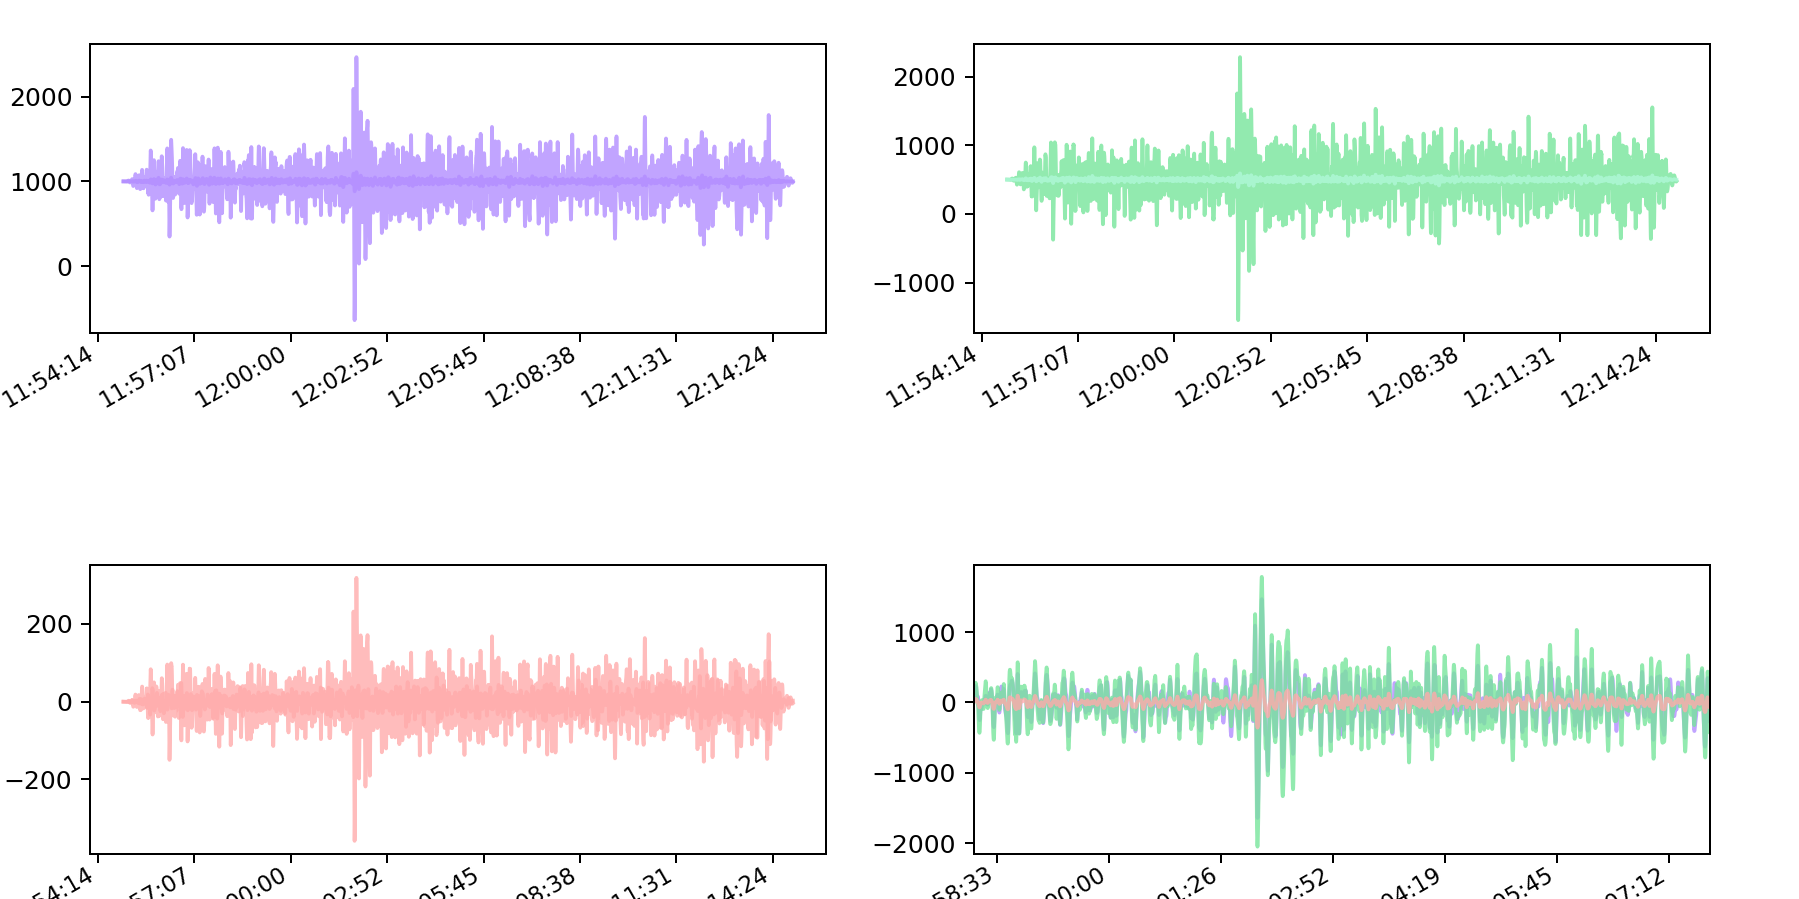

In [13]:
fig,ax = plt.subplots(2,2, figsize=(10,5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

for chan in [0,1]:
    for chann in [0,1]:
        ax[chan,chann].xaxis_date()
        x_labels = ax[chan,chann].get_xticklabels()
        ax[chan,chann].set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
        ax[chan,chann].xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax[chan,chann].xaxis.set_major_locator(ticker.MaxNLocator(8))

In [14]:
#updating matrix coefficients 

date = "2019-12-19T12:00:08"
d = date[0:10]
    
for channel in [0,1,2]:
    full_code = f_377c[channel].id
    code = full_code[12:]
        
    tr = f_377c[channel]
    t = tr.times('matplotlib')
        
    if code == 'BHU':
        U = f_377c[channel].data
    elif code == 'BHV':
        V = f_377c[channel].data
    elif code == 'BHW':
        W = f_377c[channel].data
            

h11 = u1*U + v1*V + w1*W
h22 = u2*U + v2*V + w2*W
z0 = u3*U + v3*V + w3*W

offset = np.full(len(z), fill_value=500)

ax[0,0].plot(t, h11 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[0,1].plot(t, h22 + offset, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
ax[1,0].plot(t, z0, label = 'Vertical', color = "#ffabab", alpha = 0.8)

ax[1,1].plot(t, h11, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[1,1].plot(t, h22, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
ax[1,1].plot(t, z0, label = 'Vertical', color = "#ffabab", alpha = 0.8)

In [15]:
#old plotter of Z12 coefficients
date = "2019-12-19T12:00:08"
d = date[0:10]
    
for channel in [0,1,2]:
    full_code = f_377c[channel].id
    code = full_code[12:]
        
    tr = f_377c[channel]
    t = tr.times('matplotlib')
        
    if code == 'BHU':
        U = f_377c[channel].data
    elif code == 'BHV':
        V = f_377c[channel].data
    elif code == 'BHW':
        W = f_377c[channel].data
            
h1 = (-2)*U + V + W
h2 = math.sqrt(3)*V - math.sqrt(3)*W
z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

offset = np.full(len(z), fill_value=500)

ax[0,0].plot(t, h1 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[0,1].plot(t, h2 + offset, label='Horizontal 2', color = "#aff8d8", alpha = 0.8)
ax[1,0].plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)